<a href="https://colab.research.google.com/github/lauren-safwat/Dry-Beans-Classification/blob/main/Dry_Beans_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dry Beans Classification**
- Seed quality is definitely influential in crop production. Therefore, seed classification is essential for both marketing and production to provide the principles of sustainable agricultural systems.

- In this notbook we try different algorithms to classify the most well-known 7 types of beans in Turkey; Barbunya, Bombay, Cali, Dermason, Horoz, Seker and Sira, depending ONLY on dimension and shape features of bean varieties with no external discriminatory features.

#### **Required Packages**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import QuantileTransformer, RobustScaler

from sklearn.metrics import f1_score, accuracy_score, confusion_matrix , classification_report
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

sns.set_style("darkgrid")

#### **Data fields**
- **ID**: An ID for this instance
- **Area (A)**: The area of a bean zone and the number of pixels within its boundaries.
- **Perimeter (P)**: Bean circumference is defined as the length of its border.
- **MajorAxisLength (L)**: The distance between the ends of the longest line that can be drawn from a bean.
- **MinorAxisLength (l)**: The longest line that can be drawn from the bean while standing perpendicular to the main axis.
- **AspectRatio (K)**: Defines the relationship between L and l.
- **Eccentricity (Ec)**: Eccentricity of the ellipse having the same moments as the region.
- **ConvexArea (C)**: Number of pixels in the smallest convex polygon that can contain the area of a bean seed.
- **EquivDiameter (Ed)**: The diameter of a circle having the same area as a bean seed area.
- **Extent (Ex)**: The ratio of the pixels in the bounding box to the bean area.
- **Solidity (S)**: Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.
- **Roundness (R)**: Calculated with the following formula: (4 pi A)/(P^2)
- **Compactness (CO)**: Measures the roundness of an object: Ed/L
- **ShapeFactor1 (SF1)**: L/d
- **ShapeFactor2 (SF2)**: l/d
- **ShapeFactor3 (SF3)**: 4A/(L^2 * pi)
- **ShapeFactor4 (SF4)**: 4A/(L l pi)
- **y**: The class of the bean. It can be any of BARBUNYA, SIRA, HOROZ, DERMASON, CALI, BOMBAY, and SEKER.

#### **Read Data**

In [5]:
train_data = pd.read_csv("https://raw.githubusercontent.com/lauren-safwat/Dry-Beans-Classification/main/dataset/train_data.csv?token=GHSAT0AAAAAABT3JT6HKFPQML3QUT6DT57IYT6ROCQ", index_col='ID')
test_data = pd.read_csv("https://raw.githubusercontent.com/lauren-safwat/Dry-Beans-Classification/main/dataset/test_data.csv?token=GHSAT0AAAAAABT3JT6GWMFXPK3VWSOSHU3GYT6ROTA", index_col='ID')

HTTPError: ignored

In [ ]:
train_data.head(5)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y
ID,,,,,,,,,,,,,,,,,
0,58238,971.303,397.202654,186.945510,2.124697,0.882317,58977,272.306674,0.604756,0.987470,0.775723,0.685561,0.006820,0.000929,0.469994,0.998595,HOROZ
1,44515,757.601,265.590470,213.967453,1.241266,0.592420,44780,238.071960,0.771745,0.994082,0.974620,0.896387,0.005966,0.002376,0.803510,0.997370,SEKER
2,31662,653.783,239.902428,168.421505,1.424417,0.712136,32034,200.781748,0.801407,0.988387,0.930853,0.836931,0.007577,0.002293,0.700453,0.997737,DERMASON
3,38778,734.020,268.446281,184.061923,1.458456,0.727925,39208,222.201897,0.766137,0.989033,0.904439,0.827733,0.006923,0.002005,0.685142,0.999250,DERMASON
4,42530,775.403,281.212824,193.236878,1.455275,0.726511,43028,232.703412,0.729816,0.988426,0.888895,0.827499,0.006612,0.001912,0.684755,0.996507,SIRA


### **EDA**

#### 1. Data shape and columns

In [ ]:
print("Data Shape: ", train_data.shape)

Data Shape:  (10834, 17)


In [ ]:
print("Data Columns: ", list(train_data.columns))

Data Columns:  ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent', 'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4', 'y']


#### 2. Data Summary and Information

In [ ]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,10834.0,53095.675189,29542.542580,20420.000000,36343.500000,44645.000000,61295.000000,254616.000000
Perimeter,10834.0,855.274892,214.991122,524.932000,703.601250,793.739500,975.517500,1985.370000
MajorAxisLength,10834.0,320.036169,85.961630,183.601165,253.501071,296.377365,376.068399,738.860153
MinorAxisLength,10834.0,202.410342,45.113965,129.576207,175.927024,192.525040,217.315195,450.926187
AspectRation,10834.0,1.581294,0.244314,1.024868,1.432985,1.550761,1.703029,2.388873
Eccentricity,10834.0,0.750588,0.091481,0.218951,0.716250,0.764314,0.809450,0.908167
ConvexArea,10834.0,53816.205926,29999.710739,20684.000000,36731.250000,45148.000000,62251.500000,263261.000000
EquivDiameter,10834.0,253.123583,59.433080,161.243764,215.113880,238.419335,279.362162,569.374358
Extent,10834.0,0.749937,0.048949,0.555315,0.718778,0.760141,0.786871,0.866195
Solidity,10834.0,0.987152,0.004626,0.919246,0.985627,0.988290,0.990014,0.994677


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10834 entries, 0 to 10833
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             10834 non-null  int64  
 1   Perimeter        10834 non-null  float64
 2   MajorAxisLength  10834 non-null  float64
 3   MinorAxisLength  10834 non-null  float64
 4   AspectRation     10834 non-null  float64
 5   Eccentricity     10834 non-null  float64
 6   ConvexArea       10834 non-null  int64  
 7   EquivDiameter    10834 non-null  float64
 8   Extent           10834 non-null  float64
 9   Solidity         10834 non-null  float64
 10  roundness        10834 non-null  float64
 11  Compactness      10834 non-null  float64
 12  ShapeFactor1     10834 non-null  float64
 13  ShapeFactor2     10834 non-null  float64
 14  ShapeFactor3     10834 non-null  float64
 15  ShapeFactor4     10834 non-null  float64
 16  y                10834 non-null  object 
dtypes: float64(1

#### 3. Split data into features and labels

In [ ]:
y = train_data[['y']]
X = train_data.drop('y', axis=1)

#### 4. Data Visualization

* ##### Distribution of target column

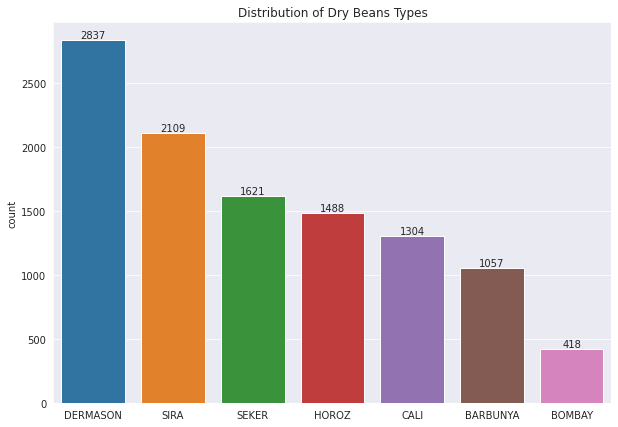

In [ ]:
plt.figure(figsize=(10, 7))
plt.title('Distribution of Dry Beans Types')
ax = sns.countplot(x=y.y, order=y.y.value_counts(ascending=False).index)

for p in ax.patches:
    x_ = p.get_bbox().get_points()[:,0]
    y_ = p.get_bbox().get_points()[1,1]
    ax.annotate(p.get_height(), (x_.mean(), y_), ha='center', va='bottom')

plt.show()

* ##### Boxplot of numerical features for each type of bean

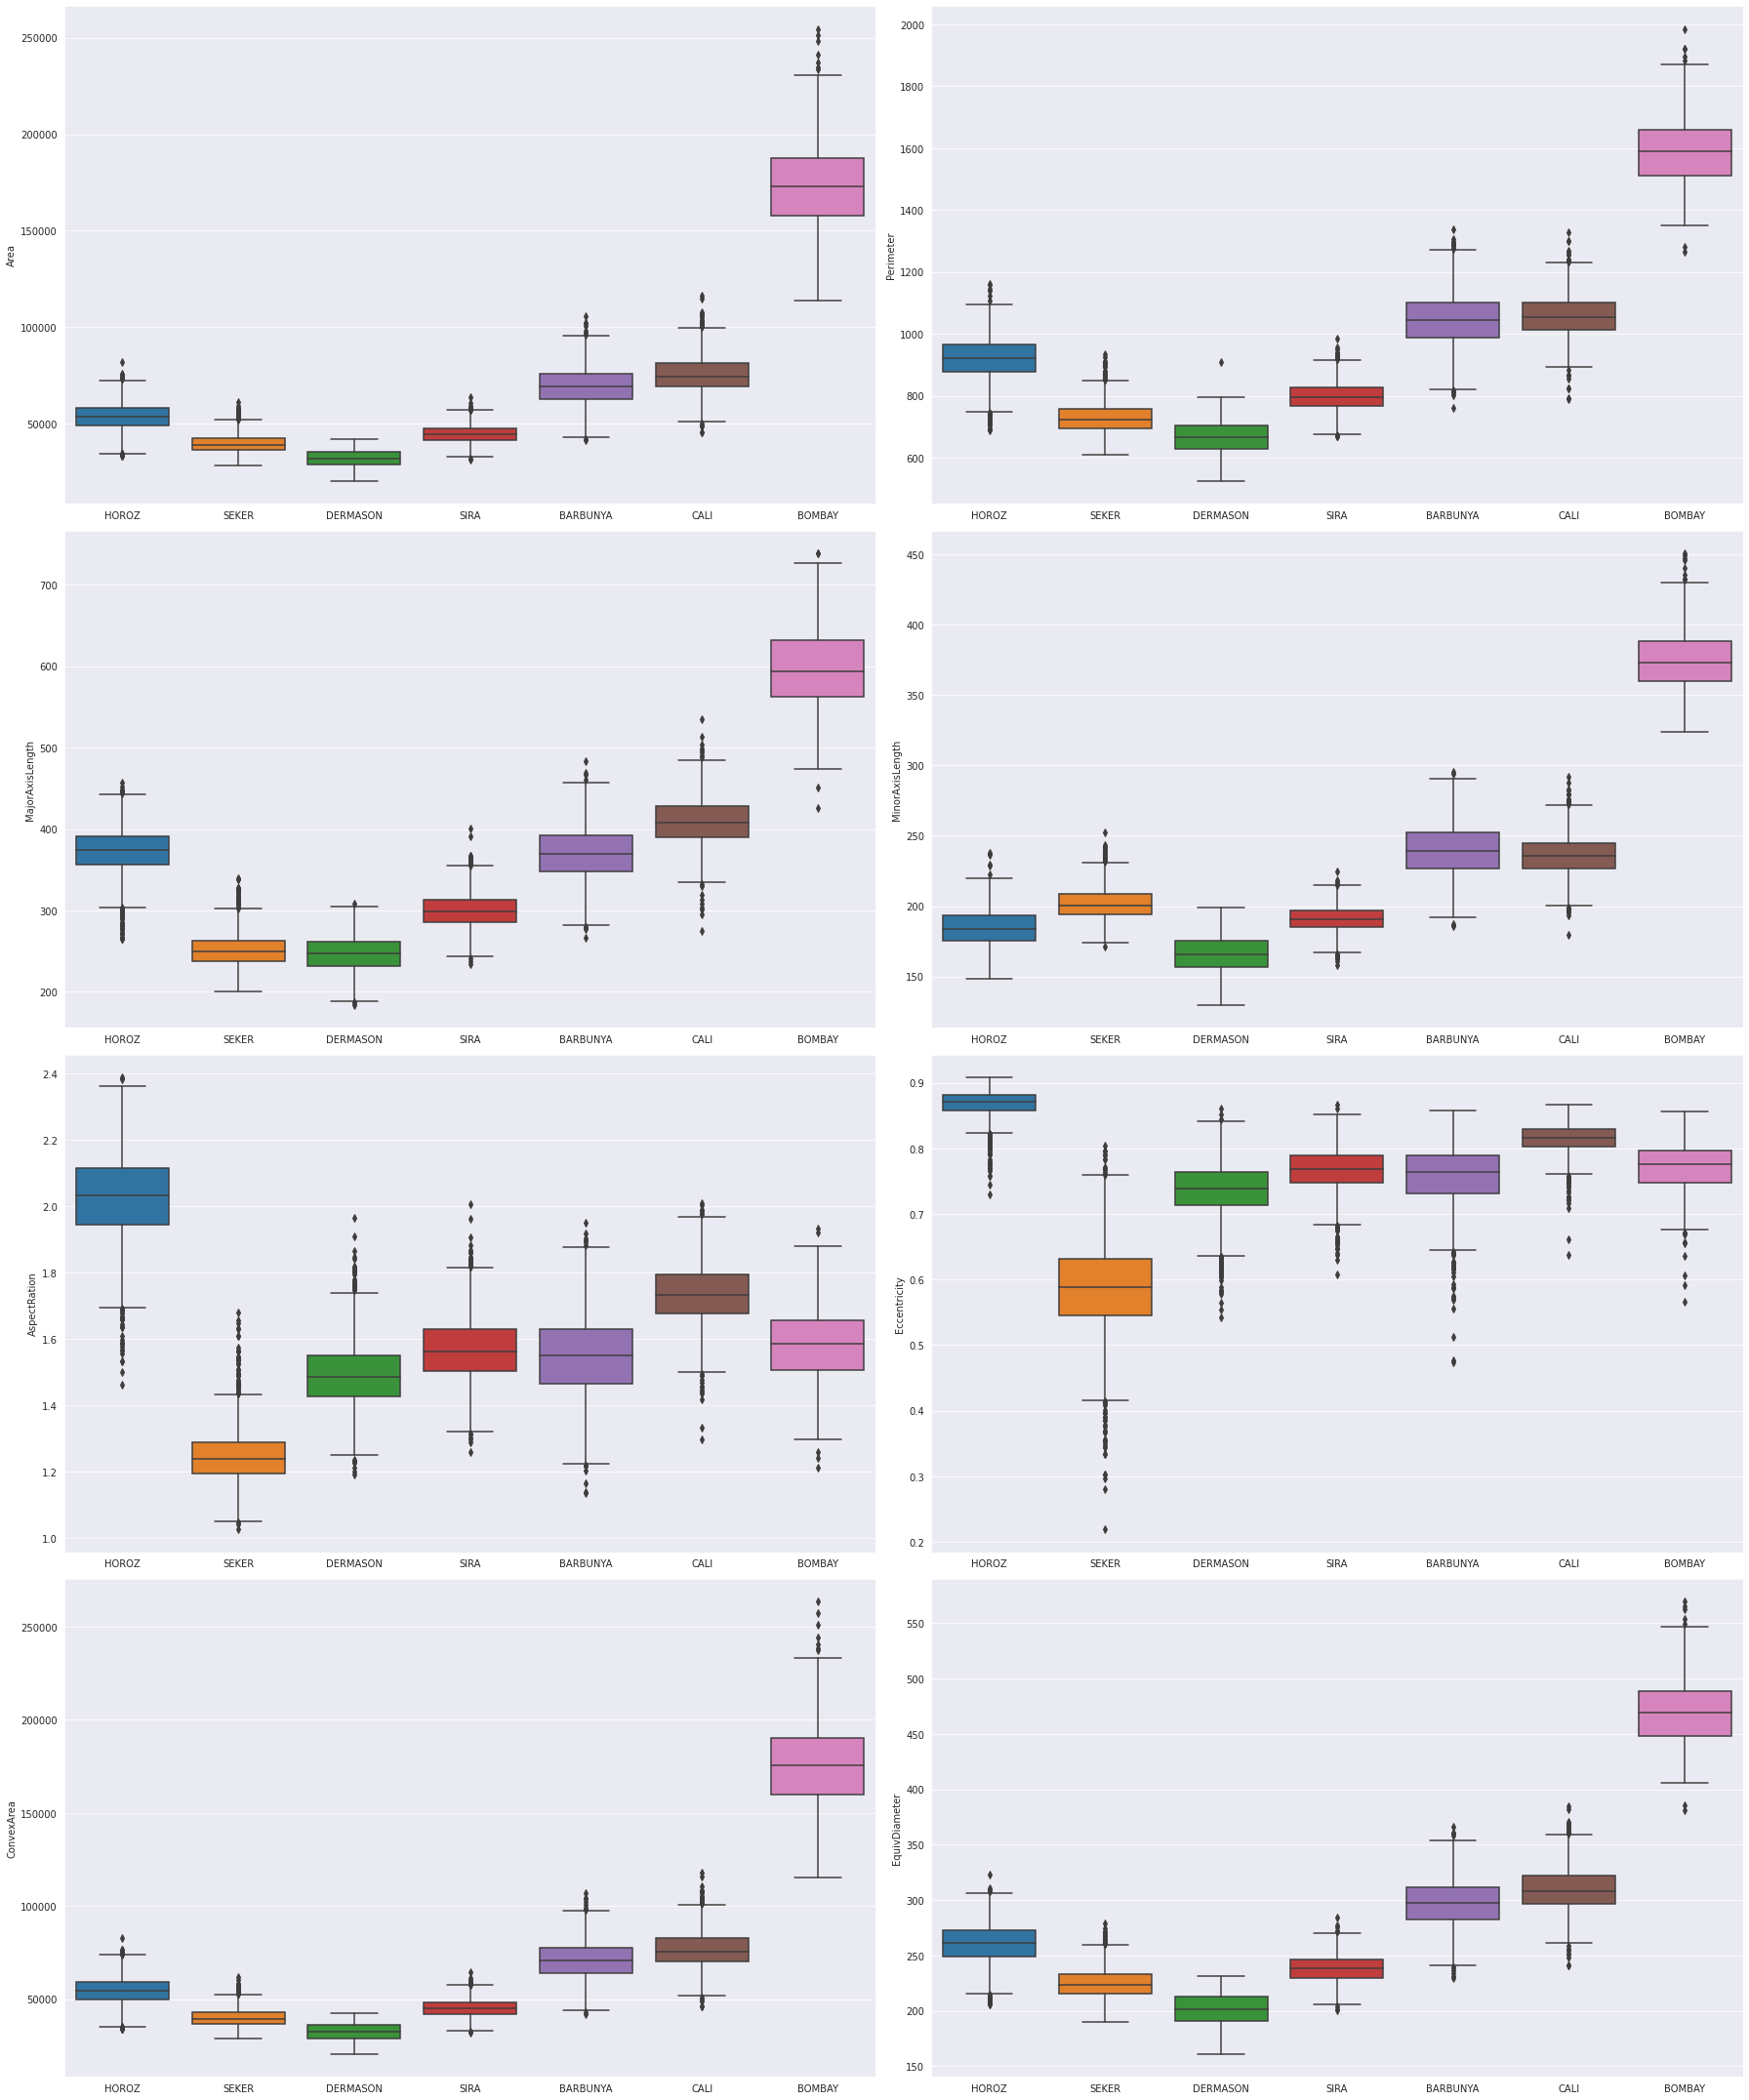

In [ ]:
fig, ax = plt.subplots(4, 2, figsize=(25, 30))

for variable, subplot in zip(X.columns, ax.flatten()):
    sns.boxplot(x=y.y, y=X[variable], ax=subplot)
plt.tight_layout()

* ##### Outliers Identification

In [ ]:
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
LB = Q1 - 1.5 * IQR
UB = Q3 + 1.5 * IQR
nOutliers = X[(X < LB) | (X > UB)].count()
nOutliers

Area               442
Perimeter          406
MajorAxisLength    316
MinorAxisLength    452
AspectRation       397
Eccentricity       683
ConvexArea         442
EquivDiameter      420
Extent             218
Solidity           604
roundness           78
Compactness        108
ShapeFactor1       430
ShapeFactor2         0
ShapeFactor3       167
ShapeFactor4       591
dtype: int64

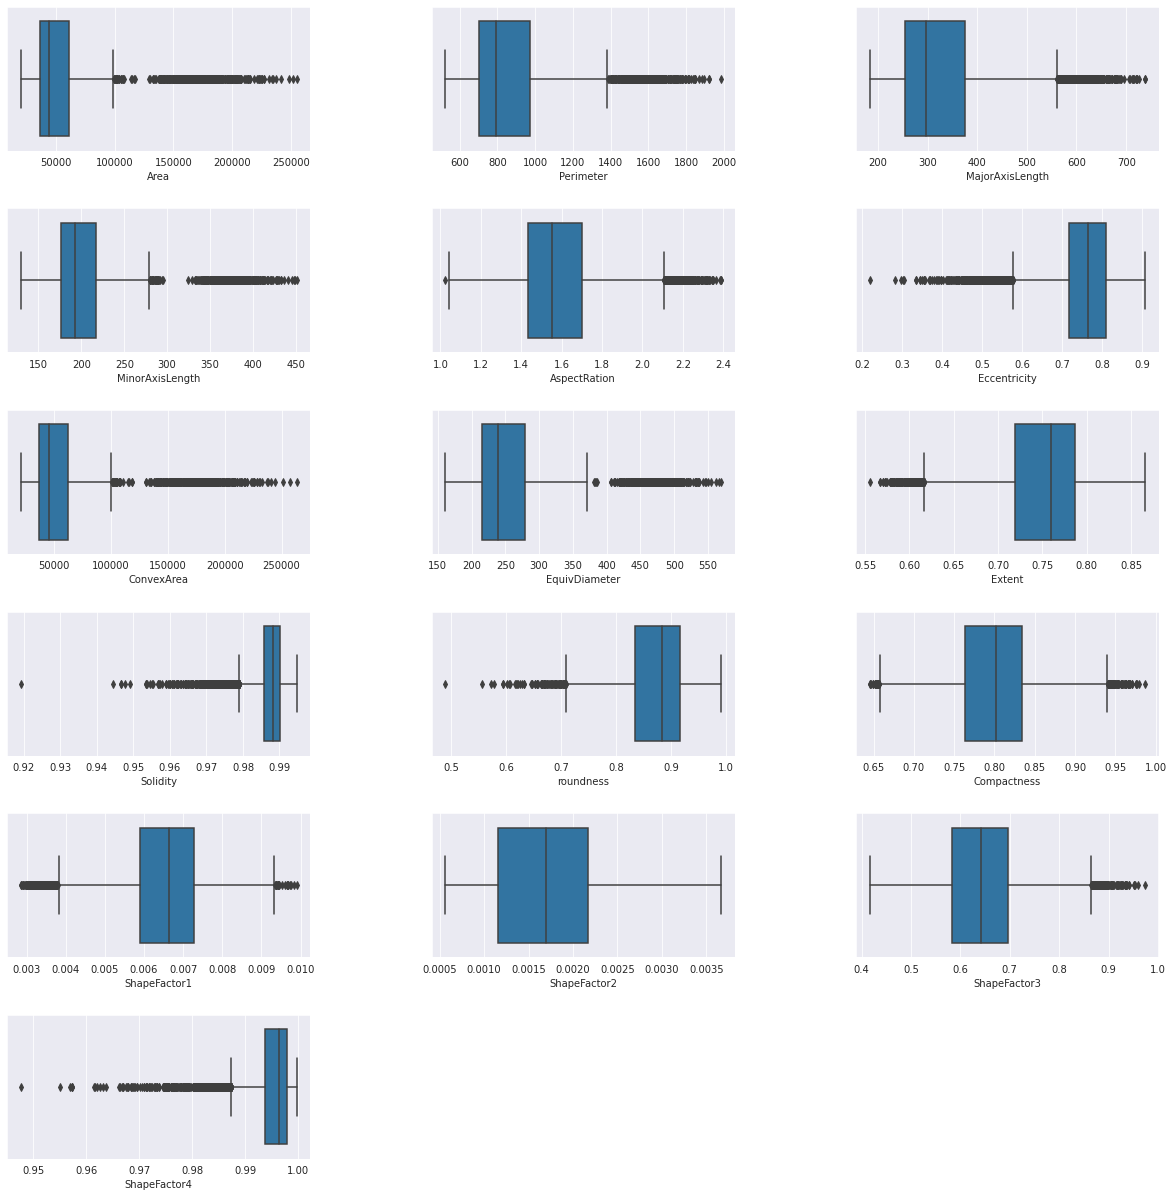

In [ ]:
f, axs = plt.subplots(figsize=(20, 20))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

for i, column in enumerate(X.columns, 1):
  plt.subplot(6, 3, i)
  sns.boxplot(X[column])

* ##### Skewness Identification

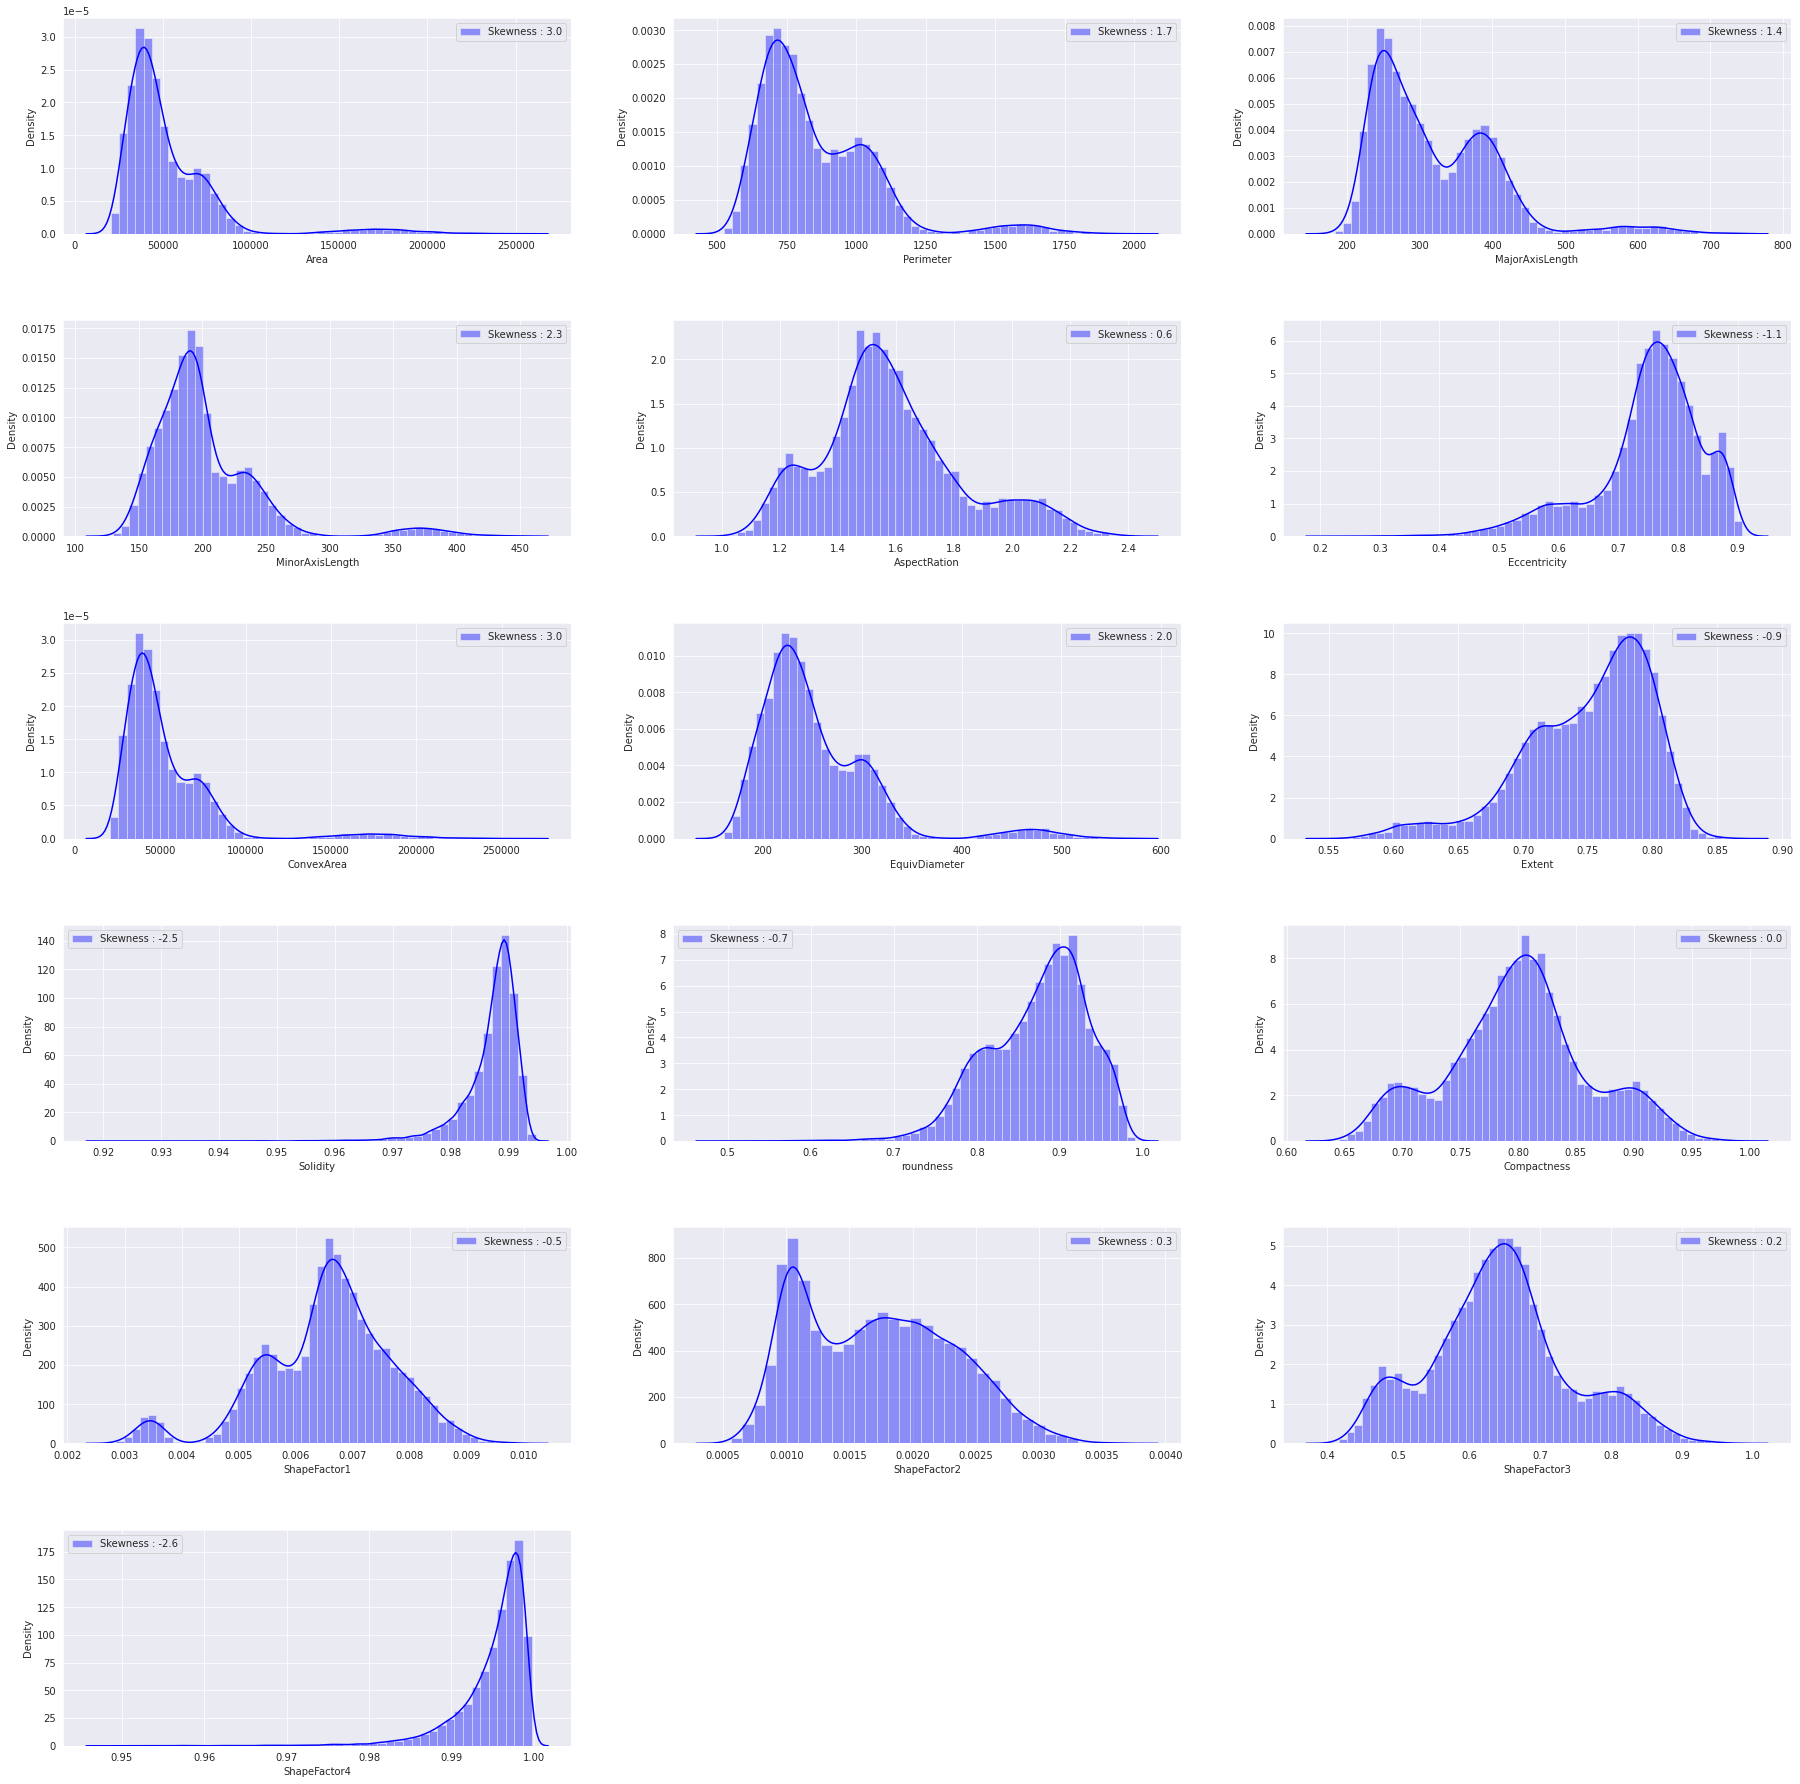

In [ ]:
f, axs = plt.subplots(figsize=(30, 30))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.4)

for i, column in enumerate(X.columns, 1):
    _ = plt.subplot(6, 3, i)
    _ = sns.distplot(X[column], color="b", label="Skewness : %.1f"%(X[column].skew()))
    plt.legend(loc="best")
plt.show()

* ##### Pearson linear correlation between features

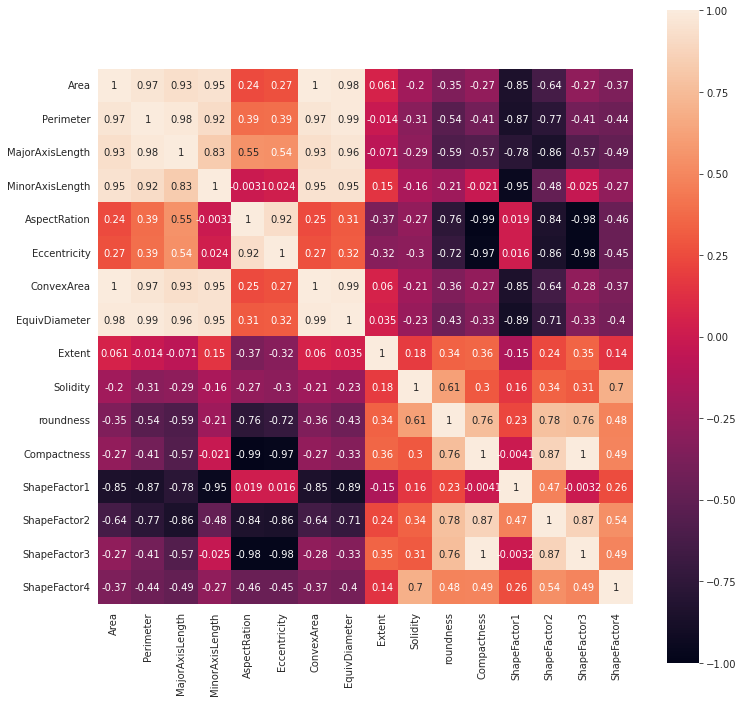

In [ ]:
plt.figure(figsize=(12, 12))
sns.heatmap(X.corr("pearson"), vmin=-1, vmax=1, annot=True, square=True)

### **Data Preprocessing**

#### 1. Feature Scaling

In [ ]:
scaler = QuantileTransformer(output_distribution='normal', random_state=0)
df = scaler.fit_transform(X)
X = pd.DataFrame(df, columns = X.columns, index = X.index)

In [ ]:
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
LB = Q1 - 1.5 * IQR
UB = Q3 + 1.5 * IQR
nOutliers = X[(X < LB) | (X > UB)].count()
nOutliers

Area               76
Perimeter          80
MajorAxisLength    74
MinorAxisLength    75
AspectRation       74
Eccentricity       74
ConvexArea         76
EquivDiameter      76
Extent             78
Solidity           74
roundness          75
Compactness        76
ShapeFactor1       76
ShapeFactor2       78
ShapeFactor3       76
ShapeFactor4       77
dtype: int64

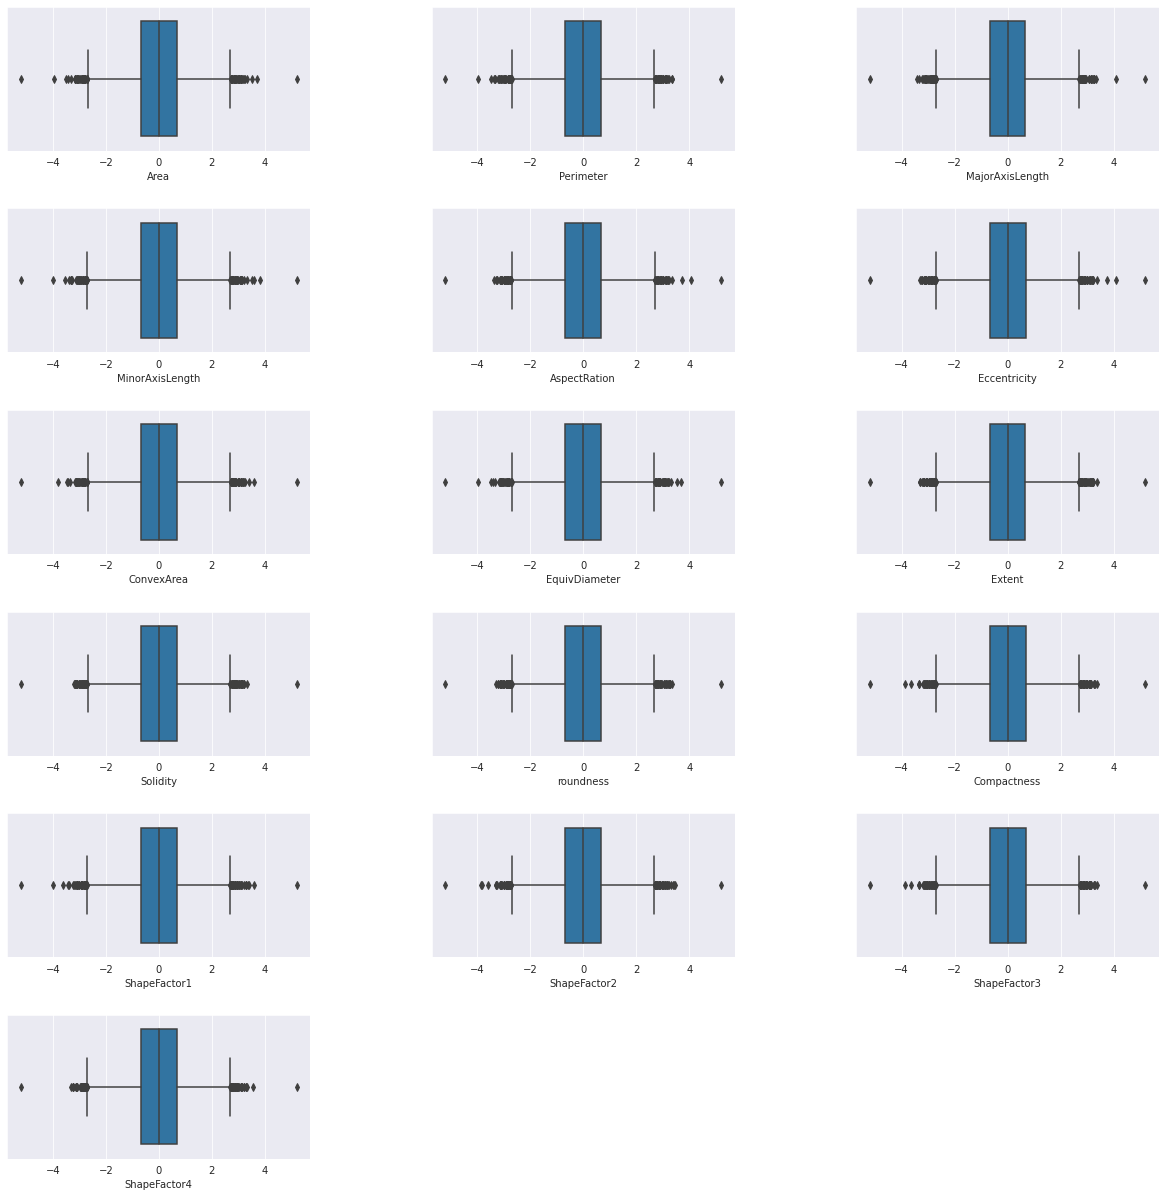

In [ ]:
f, axs = plt.subplots(figsize=(20, 20))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

for i, column in enumerate(X.columns, 1):
    plt.subplot(6, 3, i)
    sns.boxplot(X[column])

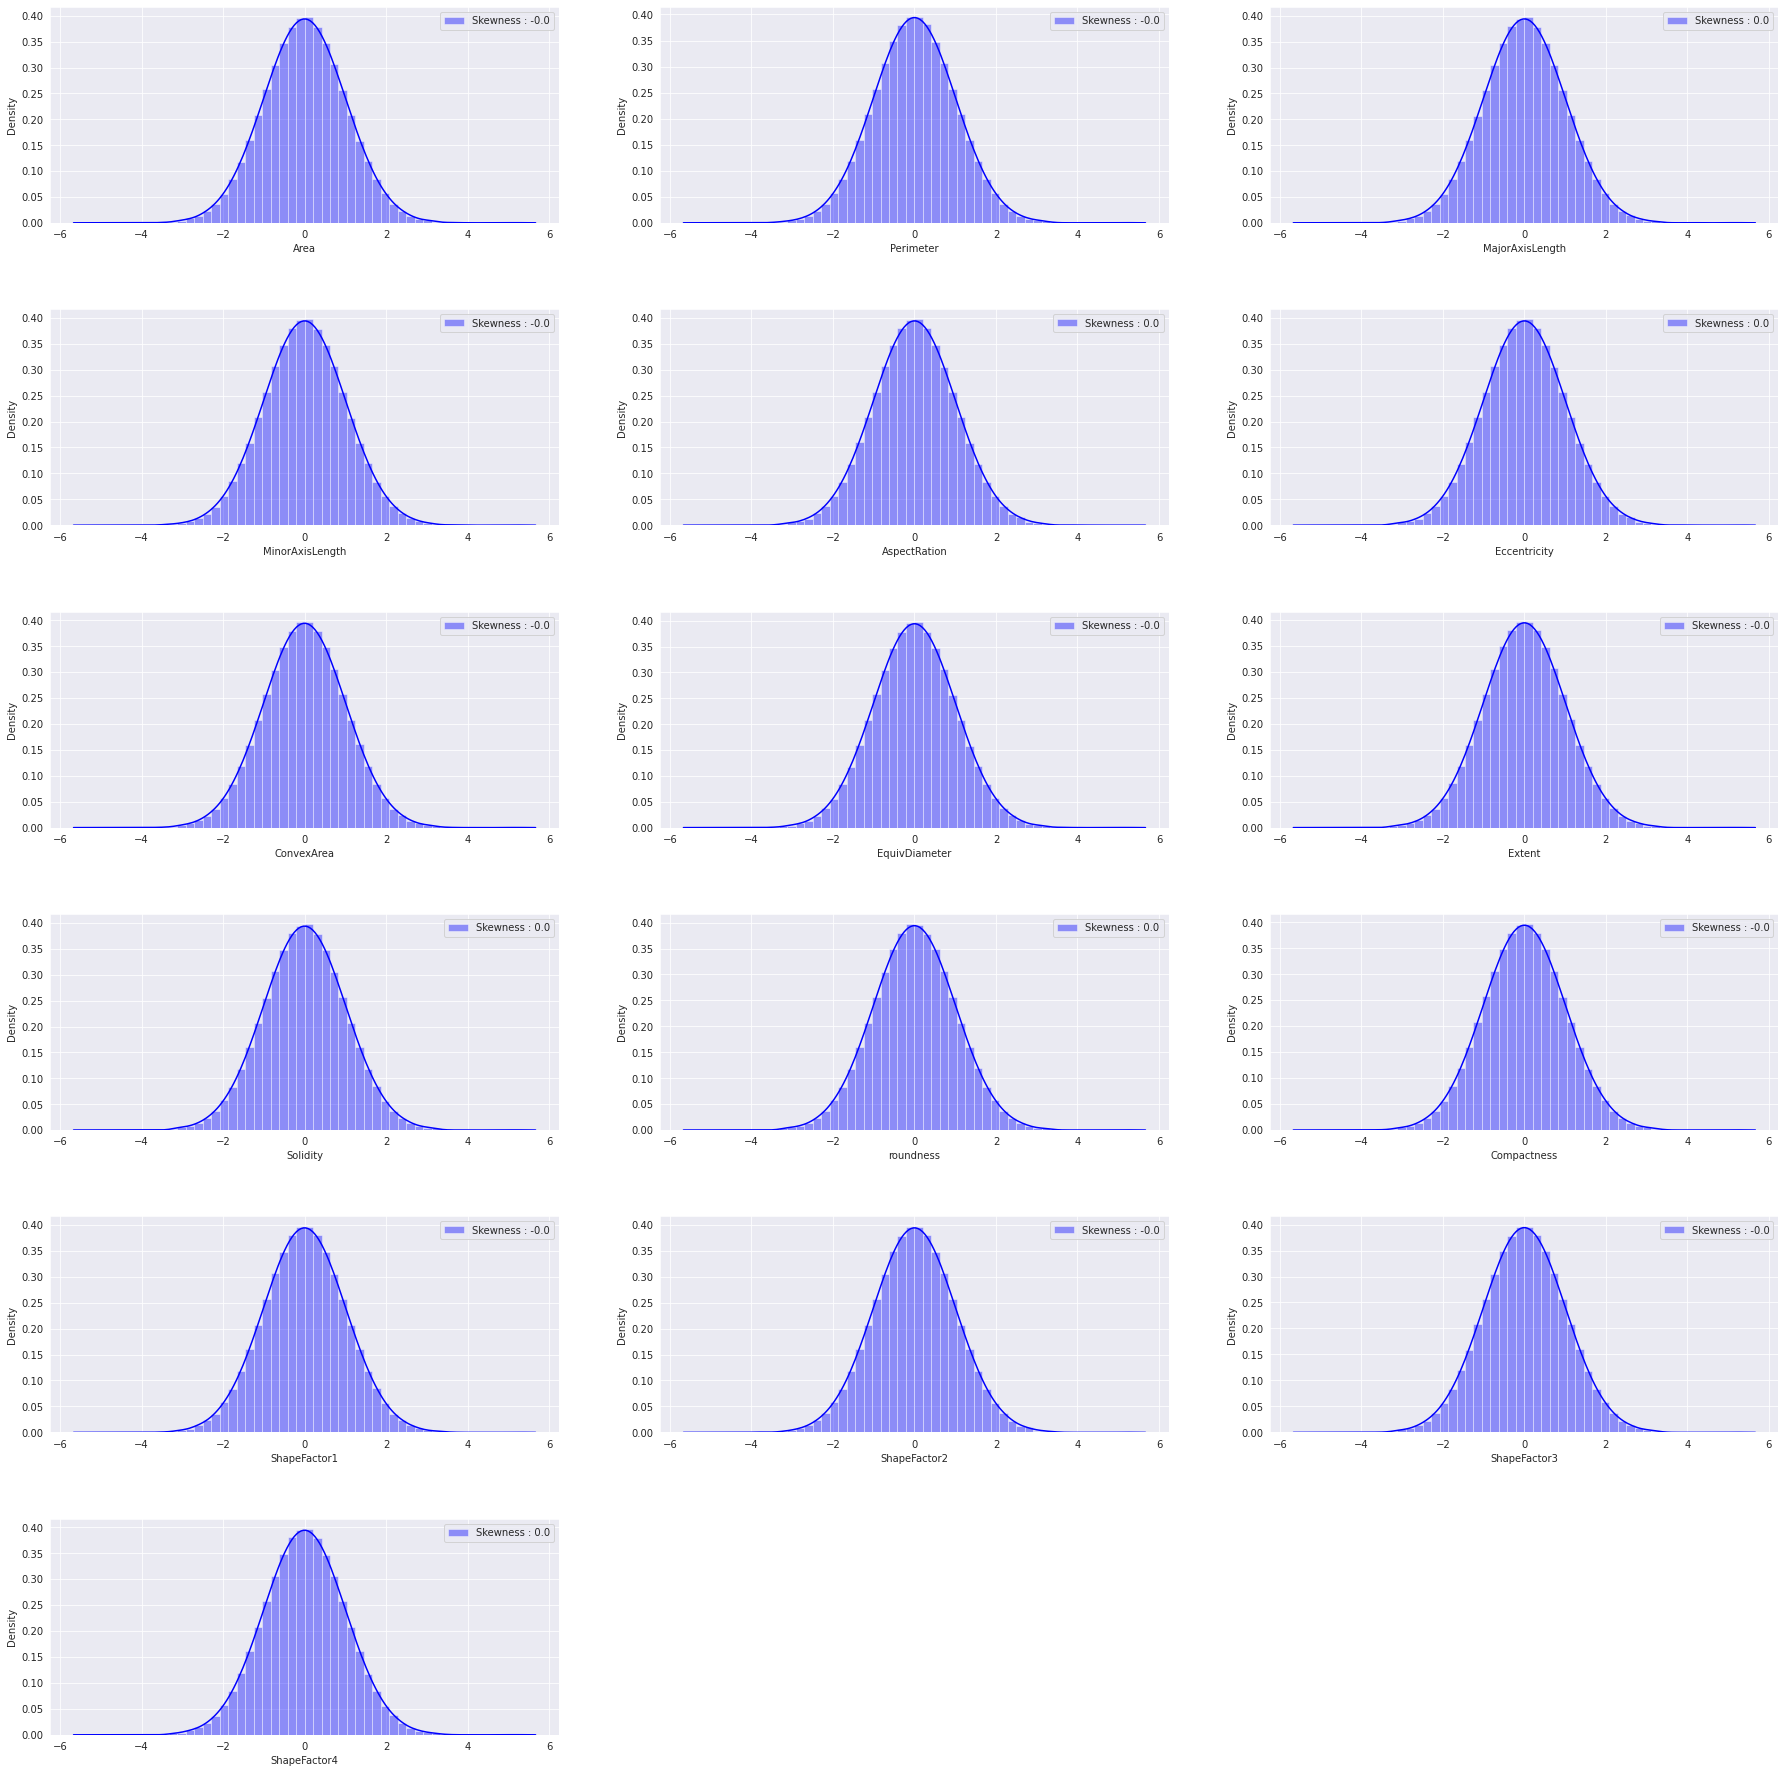

In [ ]:
f, axs = plt.subplots(figsize=(30, 30))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.4)

for i, column in enumerate(X.columns, 1):
    _ = plt.subplot(6, 3, i)
    _ = sns.distplot(X[column], color="b", label="Skewness : %.1f"%(X[column].skew()))
    plt.legend(loc="best")
plt.show()

#### 2. Encoding target column

In [ ]:
label_encoder = LabelEncoder()
y.y = label_encoder.fit_transform(y.y)
y

,y
ID,
0,4
1,5
2,3
3,3
4,6
...,...
10829,5
10830,3
10831,2


#### 3. Splitting data into train and validation sets

In [ ]:
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.1, random_state=16, stratify=y)

## **Classification Models**

### 1. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
print("Logistic regression score:", lr_model.score(X_train, y_train))
print("Logistic regression f1-score:", f1_score(y_train, lr_model.predict(X_train), average='macro'))

Logistic regression score: 0.924
Logistic regression f1-score: 0.9240622352041111


In [ ]:
print("Logistic regression score:", lr_model.score(X_validation, y_validation))
print("Logistic regression f1-score:", f1_score(y_validation, lr_model.predict(X_validation), average='macro'))

Logistic regression score: 0.9289667896678967
Logistic regression f1-score: 0.9372960225879872


### 2. Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
print("Decision Tree score:", dt_model.score(X_train, y_train))
print("Decision Tree f1-score:", f1_score(y_train, dt_model.predict(X_train), average='macro'))

Decision Tree score: 1.0
Decision Tree f1-score: 1.0


In [ ]:
print("Decision Tree score:", dt_model.score(X_validation, y_validation))
print("Decision Tree f1-score:", f1_score(y_validation, dt_model.predict(X_validation), average='macro'))

Decision Tree score: 0.9049815498154982
Decision Tree f1-score: 0.9128196079252613


### 3. SVM Classifier

In [ ]:
from sklearn.svm import SVC

svm_parameters = {'kernel': ['rbf'],
                  'C': [0.01, 0.1, 1 , 10, 100],
                  'gamma': [0.01, 0.1, 1, 10, 100]
}

svm_model = SVC()
svm_gs = GridSearchCV(estimator = svm_model, param_grid = svm_parameters)
svm_gs.fit(X_train, y_train)
svm_winner = svm_gs.best_estimator_
svm_winner

print("SVM score:", svm_winner.score(X_train, y_train))
print("SVM f1-score:", f1_score(y_train, svm_winner.predict(X_train), average='macro'))

SVM score: 0.9339487179487179
SVM f1-score: 0.9458079749154965


In [ ]:
print("SVM score:", svm_winner.score(X_validation, y_validation))
print("SVM f1-score:", f1_score(y_validation, svm_winner.predict(X_validation), average='weighted'))

SVM score: 0.9326568265682657
SVM f1-score: 0.9324085952465931


### 4. Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
print("Random Forest score:", rf_model.score(X_train, y_train))
print("Random Forest f1-score:", f1_score(y_train, rf_model.predict(X_train), average='macro'))

Random Forest score: 1.0
Random Forest f1-score: 1.0


In [ ]:
print("Random Forest score:", rf_model.score(X_validation, y_validation))
print("Random Forest f1-score:", f1_score(y_validation, rf_model.predict(X_validation), average='macro'))

Random Forest score: 0.9345018450184502
Random Forest f1-score: 0.9406162456009609


### 5. Gradient Boost Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
print("Gradient Boost score:", gb_model.score(X_train, y_train))
print("Gradient Boost f1-score:", f1_score(y_train, gb_model.predict(X_train), average='macro'))

Gradient Boost score: 0.9632820512820512
Gradient Boost f1-score: 0.9720265177348011


In [ ]:
print("Gradient Boost score:", gb_model.score(X_validation, y_validation))
print("Gradient Boost f1-score:", f1_score(y_validation, gb_model.predict(X_validation), average='weighted'))

Gradient Boost score: 0.9298892988929889
Gradient Boost f1-score: 0.9295563548452933


### 6. AdaBoost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ab_model = AdaBoostClassifier()
ab_model.fit(X_train, y_train)
print("AdaBoost Classifier score:", ab_model.score(X_train, y_train))
print("AdaBoost Classifier f1-score:", f1_score(y_train, ab_model.predict(X_train), average='macro'))

AdaBoost Classifier score: 0.6847179487179487
AdaBoost Classifier f1-score: 0.6291470219904123


In [ ]:
print("AdaBoost Classifier score:", ab_model.score(X_validation, y_validation))
print("AdaBoost Classifier f1-score:", f1_score(y_validation, ab_model.predict(X_validation), average='macro'))

AdaBoost Classifier score: 0.690959409594096
AdaBoost Classifier f1-score: 0.6259262196355883
